#⚽Soccer Position Classsifier

###Introduction

축구에서 포지션은 축구장에서 어디에 위치할 것인가, 어떤 액션을 취할 것인가를 정의하는 중요한 부분이다. 이전에는 주로 활동하는 위치에 따라 포지션을 구분했다. 측면에 위치하면 측면 공격수 혹은 측면 수비수, 중앙에서 활동하면 미드필더, 상대 골대측에 가까운 선수는 공격수 등 위치가 곧 포지션을 의미했다. 하지만 축구가 발전하고 전술이 복잡해지면서 포지션을 명확하게 구분하는 것이 어려워졌다. 예로 최근 축구 전술에서 많이 등장하는 '메짤라'라는 포지션은 미드필더이지만 공격시에는 측면 공격수처럼 활동한다. 이처럼 포지션을 명확하게 구분짓기가 어렵다.

###Objectives

해당 프로젝트에서는 경기 내 기록된 여러 스텟과 선수의 기본적 바탕을 바탕으로 포지션을 구분지으려 한다. 포지션을 분류하는 것은 축구 전술에 기본이며, 축구를 관람하고 분석하는데도 가장 중요한 부분이다. 실제로 국가대표 선수 출신 해설가 안정환은 공격수로 인식되는 솔샤르 선수를 미드필더라 칭해 많은 사람들이 축구 지식에 대한 의문을 품었다. 해당 분류 모델을 통해 선수가 실제로 진행하는 행위로 포지션을 분류해 축구를 명확히 바라보는데 도움을 줄 것이다.

포지션 분류에서 가장 중요한 부분은 경기 내 액션이다. 위치를 바탕으로 포지션을 나누는 것은 이전의 방식이다. 그런 방식으로는 측면에서 주로 활동하는 미드필더 메짤라나 연계 위주로 플레이하는 세컨드 스트라이커 등을 명확히 구분지을 수 없다. 경기 내 어떤 플레이를 했는지 스탯을 통해 분석해 명확한 포지션 구분을 하려한다.



#📋Setting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/개인과제 - 축구 포지션/transfermarkt_fbref_201718.csv', delimiter=';', index_col=0)
df2 = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/개인과제 - 축구 포지션/transfermarkt_fbref_201819.csv', delimiter=';', index_col=0)
df3 = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/개인과제 - 축구 포지션/transfermarkt_fbref_201920.csv', delimiter=';', index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (395) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2232, 399)
(2232, 399)
(2644, 399)


In [4]:
df = pd.concat([df1,df2,df3])
df.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379.0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#
2530.0,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#
721.0,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#
2512.0,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#
882.0,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#


In [5]:
df.shape

(7108, 399)

해당 분석은 선수의 기본적 특성과 플레이와 관련된 데이터를 통해 포지션을 분류.\
경기 외 데이터나 사후 변수의 경우 제외하였으며, error나 miscontrol처럼 포지션과 관계없는 데이터는 제외\
xg 등의 추가적인 작업을 통해 만들어진 변수도 제거함

In [6]:
keep_list = ['position2','goals','assists','cards_yellow','cards_red','shots_total','passes','passes_short','passes_medium','passes_long',
             'through_balls','crosses','tackles','pressures','pressures_def_3rd','pressures_mid_3rd','pressures_att_3rd','blocks',
             'interceptions','clearances','touches','dribbles','carries','fouls','fouled','offsides','cards_yellowm','cards_redm',
             'passesm','passes_shortm','passes_mediumm','passes_into_final_thirdm','passes_into_penalty_aream','crosses_into_penalty_aream',
             'crossesm','throw_insm','passes_offsidesm','tacklesm','pressuresm']

In [7]:
drop_list = [col for col in df.columns if col not in keep_list]
df.drop(labels = drop_list,axis =1, inplace = True)

In [8]:
df.shape

(7108, 39)

분류 대상이 될 position2에 대한 변환 필요\
먼저 포지션 분류 목표에 따라 좌우 구분은 따로 하지 않으며 다른 포지션과 구분이 명확한 골키퍼 또한 제외\
포지션 구분은 먼저 가장 기본이 되는 포지션인 [공격수, 윙어, 공격형 미드필더, 중앙미드필더, 수비형미드필더, 측면수비수,  중앙수비수]로 분류

In [9]:
df['position2'].value_counts()

Defender - Centre-Back             1252
Forward - Centre-Forward            671
Midfielder - Central Midfield       666
Defender - Right-Back               593
Goalkeeper                          535
Defender - Left-Back                531
Midfielder - Defensive Midfield     367
Forward - Right Winger              337
attack - Centre-Forward             324
midfield - Central Midfield         314
Forward - Left Winger               309
Midfielder - Attacking Midfield     255
midfield - Defensive Midfield       184
attack - Left Winger                148
attack - Right Winger               142
midfield - Attacking Midfield       112
Forward - Second Striker             62
Midfielder - Left Midfield           55
Midfielder - Right Midfield          41
attack - Second Striker              34
midfield - Right Midfield            22
midfield - Left Midfield             21
Central Midfield                      1
Name: position2, dtype: int64

In [10]:
df.drop(df[df['position2']=='Goalkeeper'].index,inplace=True)

In [11]:
df.replace('Defender - Centre-Back','CB',inplace=True)
df.replace(['attack - Left Winger','attack - Right Winger','Forward - Right Winger','Forward - Left Winger'],'FW',inplace=True)
df.replace(['attack - Second Striker','Forward - Second Striker'],'FW',inplace=True)
df.replace(['midfield - Attacking Midfield','Midfielder - Attacking Midfield'],'MF',inplace=True)
df.replace(['midfield - Defensive Midfield','Midfielder - Defensive Midfield'],'MF',inplace=True)
df.replace(['midfield - Central Midfield','Midfielder - Central Midfield','Central Midfield'],'MF',inplace=True)
df.replace(['attack - Centre-Forward','Forward - Centre-Forward'],'FW',inplace=True)
df.replace(['Midfielder - Right Midfield','Midfielder - Left Midfield','midfield - Right Midfield','midfield - Left Midfield'],'MF',inplace=True)
df.replace(['Defender - Right-Back','Defender - Left-Back'],'WB',inplace=True)

In [12]:
df.rename(columns = {'position2':'position'},inplace=True)

In [13]:
df['position'].value_counts()

FW    1787
MF    1762
CB    1110
WB     981
Name: position, dtype: int64

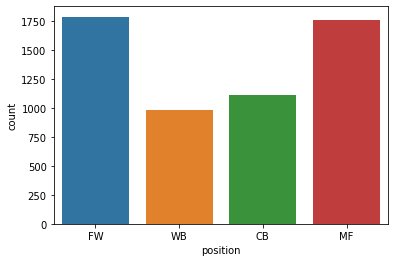

In [14]:
sns.countplot(x="position", data=df)

In [15]:
df.head()

,position,goals,assists,cards_yellow,cards_red,shots_total,passes,passes_short,passes_medium,passes_long,...,passes_shortm,passes_mediumm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,crossesm,throw_insm,passes_offsidesm,tacklesm,pressuresm
379.0,FW,1.0,1.0,1.0,0.0,14.0,354.0,154.0,143.0,41.0,...,0.162124,0.158630,0.019567,0.001398,0.000000,0.000699,0.004193,0.000000,0.029350,0.206150
721.0,WB,0.0,2.0,9.0,2.0,8.0,963.0,366.0,373.0,200.0,...,0.001462,0.011696,0.019006,0.000000,0.000000,0.000000,0.000000,0.001754,0.000000,0.000585
2512.0,CB,1.0,0.0,7.0,0.0,11.0,1591.0,514.0,804.0,252.0,...,0.178363,0.352827,0.026316,0.001949,0.000000,0.001949,0.000000,0.001949,0.021442,0.126706
882.0,MF,3.0,0.0,9.0,0.0,26.0,997.0,398.0,391.0,174.0,...,0.190583,0.300448,0.051570,0.002242,0.000000,0.002242,0.002242,0.000000,0.029148,0.103139
1002.0,FW,3.0,2.0,3.0,0.0,29.0,345.0,196.0,99.0,35.0,...,0.283342,0.412179,0.097131,0.013588,0.003523,0.015601,0.017111,0.001510,0.022144,0.241570


age와 height 데이터가 없는 행의 경우 기본적인 데이터부터 부족함으로 아예 행을 제거\
그 외 데이터가 없는 경우 결측치 유지하고 분석 진행(대체하기에는 포지션별로 너무 다양한 분포를 띄고 있음)

###결측치

In [16]:
df.isna().sum()

position                      132
goals                         132
assists                       132
cards_yellow                  132
cards_red                     132
shots_total                   132
passes                        132
passes_short                  132
passes_medium                 132
passes_long                   132
through_balls                 132
crosses                       132
tackles                       132
pressures                     132
pressures_def_3rd             132
pressures_mid_3rd             132
pressures_att_3rd             132
blocks                        132
interceptions                 132
clearances                    132
touches                       132
dribbles                      132
carries                       132
fouls                         132
fouled                        132
offsides                      132
cards_yellowm                 248
cards_redm                    248
passesm                       248
passes_shortm 

In [17]:
df.dropna(subset=['position'],inplace=True)

In [18]:
df.dropna(subset=['cards_yellowm'],inplace=True)

In [19]:
df.isna().sum()

position                      0
goals                         0
assists                       0
cards_yellow                  0
cards_red                     0
shots_total                   0
passes                        0
passes_short                  0
passes_medium                 0
passes_long                   0
through_balls                 0
crosses                       0
tackles                       0
pressures                     0
pressures_def_3rd             0
pressures_mid_3rd             0
pressures_att_3rd             0
blocks                        0
interceptions                 0
clearances                    0
touches                       0
dribbles                      0
carries                       0
fouls                         0
fouled                        0
offsides                      0
cards_yellowm                 0
cards_redm                    0
passesm                       0
passes_shortm                 0
passes_mediumm                0
passes_i

In [20]:
df.shape

(5524, 39)

특정 행의 값 전체 혹은 대부분의 데이터가 결측치로 존재하는 경우가 많았음
해당 데이터는 사용할 수 없는 데이터라고 판단
결측치가 포함된 행은 일괄적으로 제거

#📊Exploratory Data Analysis

In [21]:
pip install ggplot

     |████████████████████████████████| 2.2 MB 5.2 MB/s 


In [22]:
    from plotnine import *
    import matplotlib.pyplot as plt

In [23]:
def plot_bar(col):
  df_group = df.groupby(by='position')[col].mean()
  label = df_group.index
  index = np.arange(len(label))
  plt.bar(index, df_group)
  plt.xticks(index, label,fontsize = 10)
  plt.style.use('seaborn')
  plt.show()

def group_pos(col):
  return df.groupby(by='position')[col].describe()

def hist(col):
  plt.figure(figsize=(8,6))
  sns.distplot(df[df.position=='CB'][col],color='blue',label='CB',bins=10)
  sns.distplot(df[df.position=='WB'][col],color='green',label='WB',bins=10)
  sns.distplot(df[df.position=='MF'][col],color='red',label='MF',bins=10)
  sns.distplot(df[df.position=='FW'][col],color='yellow',label='FW',bins=10)
  plt.legend()

In [24]:
def plot_box(col):
  df_group = df.groupby(by='position')[col].mean()
  label = df_group.index
  index = np.arange(len(label))
  plt.box(index, df_group)
  plt.xticks(index, label,fontsize = 10)
  plt.style.use('seaborn')
  plt.show()

In [25]:
def box(col):
  sns.boxplot(x="position", y=col, data=df)
def vl(col):
  sns.violinplot(data=df, x="position", y=col)
  plt.show() 

###Goal

In [26]:
group_pos('goals')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.773394,1.155109,0.0,0.0,0.0,1.0,11.0
FW,1753.0,4.103822,5.247695,0.0,0.0,2.0,6.0,36.0
MF,1722.0,1.409988,2.102342,0.0,0.0,1.0,2.0,18.0
WB,959.0,0.604797,1.141922,0.0,0.0,0.0,1.0,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

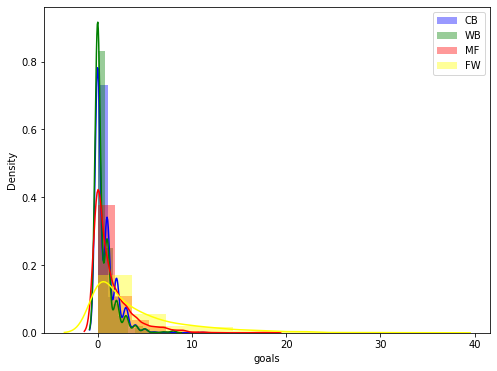

In [27]:
hist('goals')

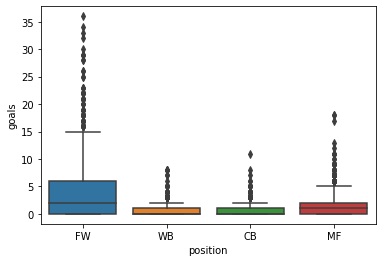

In [28]:
box('goals')

###Assists

In [29]:
group_pos('assists')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.401835,0.696308,0.0,0.0,0.0,1.0,4.0
FW,1753.0,1.879635,2.537122,0.0,0.0,1.0,3.0,21.0
MF,1722.0,1.473868,2.120611,0.0,0.0,1.0,2.0,20.0
WB,959.0,1.287800,1.691366,0.0,0.0,1.0,2.0,13.0


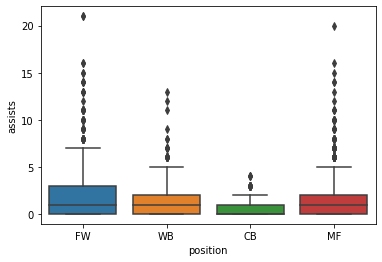

In [30]:
box('assists')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

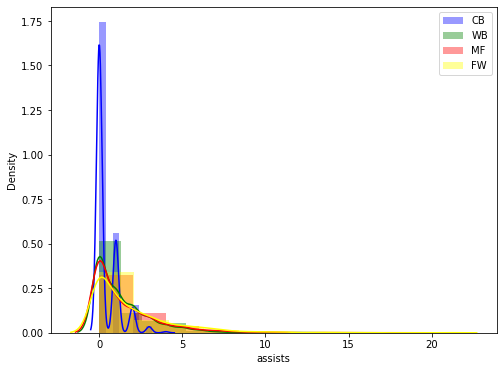

In [31]:
hist('assists')

###cards yellow

In [32]:
group_pos('cards_yellow')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,3.566055,2.988153,0.0,1.0,3.0,5.0,17.0
FW,1753.0,2.010839,2.207138,0.0,0.0,1.0,3.0,14.0
MF,1722.0,3.424506,3.146130,0.0,1.0,3.0,5.0,17.0
WB,959.0,3.063608,2.701411,0.0,1.0,3.0,5.0,17.0


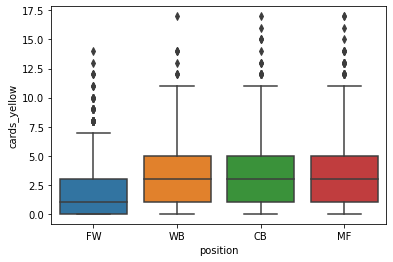

In [33]:
box('cards_yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

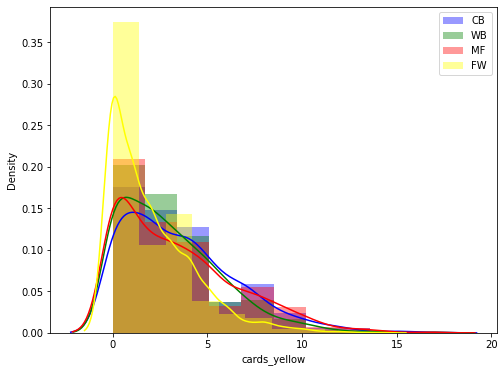

In [34]:
hist('cards_yellow')

###cards_red

In [35]:
group_pos('cards_red')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.223853,0.538150,0.0,0.0,0.0,0.0,4.0
FW,1753.0,0.096977,0.335762,0.0,0.0,0.0,0.0,2.0
MF,1722.0,0.153310,0.444167,0.0,0.0,0.0,0.0,4.0
WB,959.0,0.151199,0.437153,0.0,0.0,0.0,0.0,3.0


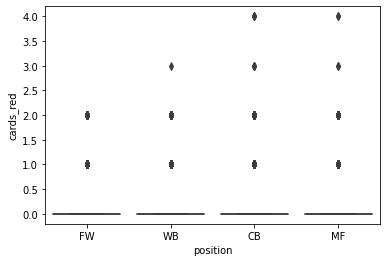

In [36]:
box('cards_red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

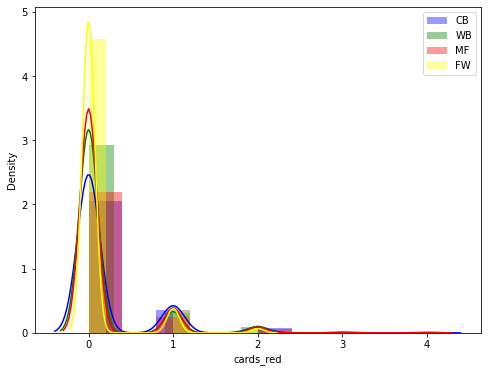

In [37]:
hist('cards_red')

In [38]:
df.drop('cards_red',axis = 1, inplace=True)

###shots_total

In [39]:
group_pos('shots_total')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,8.588991,7.982871,0.0,2.0,7.0,13.0,47.0
FW,1753.0,30.686823,29.453092,0.0,7.0,23.0,46.0,194.0
MF,1722.0,17.702671,17.458572,0.0,4.0,13.0,26.0,102.0
WB,959.0,9.186653,9.737451,0.0,2.0,6.0,14.0,69.0


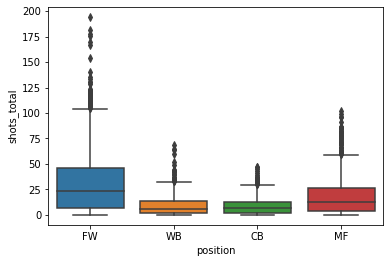

In [40]:
box('shots_total')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

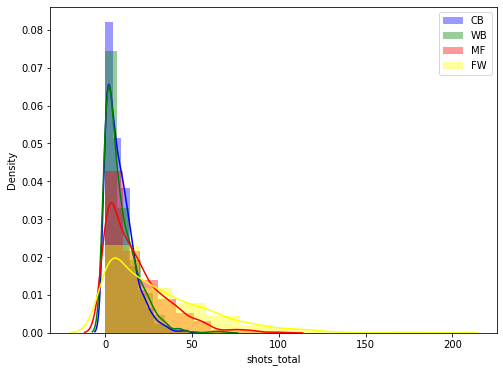

In [41]:
hist('shots_total')

###Passes

In [42]:
group_pos('passes')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,861.028440,604.835875,0.0,342.0,818.0,1265.50,3085.0
FW,1753.0,400.356532,374.784472,0.0,95.0,306.0,604.00,2532.0
MF,1722.0,743.658537,606.876074,0.0,224.0,625.0,1143.25,3229.0
WB,959.0,831.458811,597.849401,0.0,305.0,801.0,1218.50,3147.0


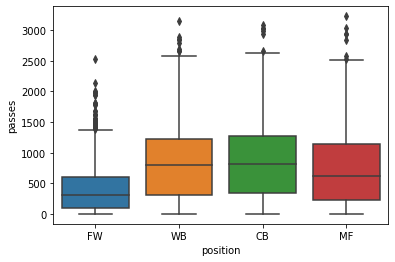

In [43]:
box('passes')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

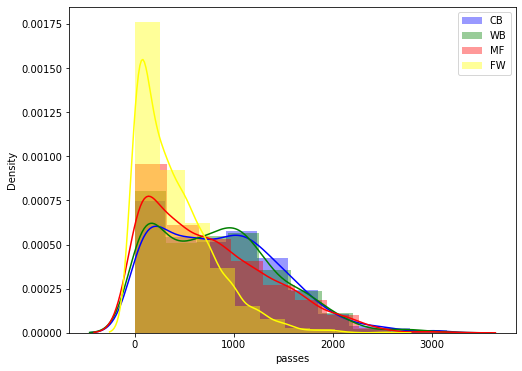

In [44]:
hist('passes')

###Short passes

In [45]:
group_pos('passes_short')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,226.892661,171.425452,0.0,90.0,205.0,321.0,1183.0
FW,1753.0,193.689104,178.300263,0.0,47.0,151.0,291.0,1546.0
MF,1722.0,297.894309,242.990538,0.0,95.0,253.0,452.5,1745.0
WB,959.0,329.360792,249.436415,0.0,120.0,304.0,477.0,1434.0


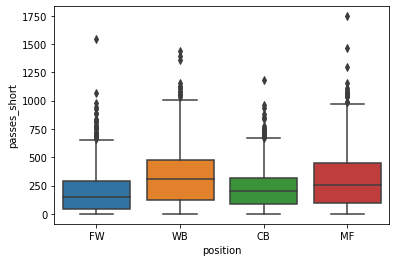

In [46]:
box('passes_short')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

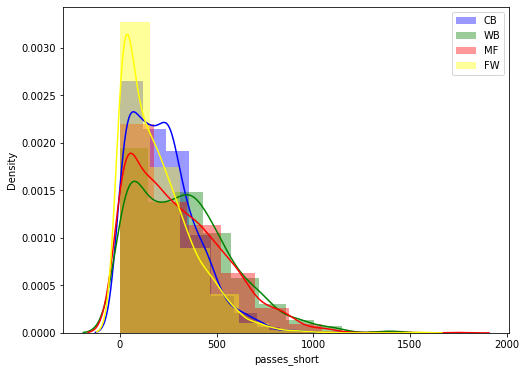

In [47]:
hist('passes_short')

###Midium passes

In [48]:
group_pos('passes_medium')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,416.361468,304.069928,0.0,162.0,385.5,607.75,1625.0
FW,1753.0,130.745579,127.090879,0.0,30.0,96.0,193.00,823.0
MF,1722.0,292.339141,248.998727,0.0,82.0,240.0,443.00,1401.0
WB,959.0,335.631908,244.280921,0.0,124.5,316.0,489.00,1384.0


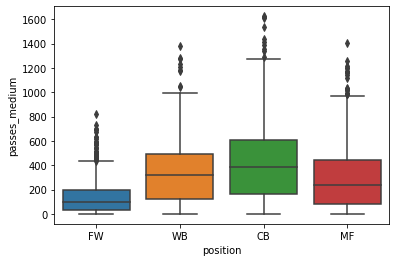

In [49]:
box('passes_medium')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

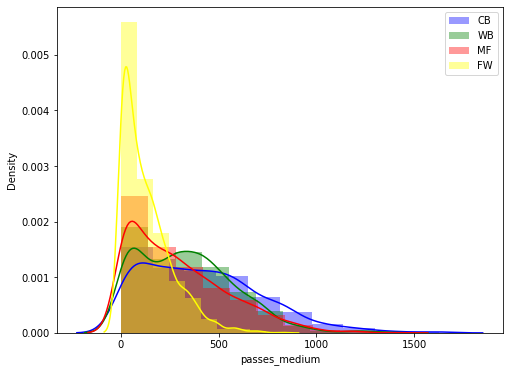

In [50]:
hist('passes_medium')

###Long Passes

In [51]:
group_pos('passes_long')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,202.899083,147.197040,0.0,73.0,189.0,299.00,766.0
FW,1753.0,50.881346,62.195538,0.0,8.0,29.0,71.00,443.0
MF,1722.0,126.790941,120.196703,0.0,32.0,95.0,185.75,723.0
WB,959.0,135.821689,111.090319,0.0,47.0,120.0,194.00,902.0


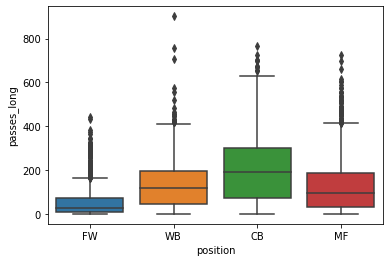

In [52]:
box('passes_long')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

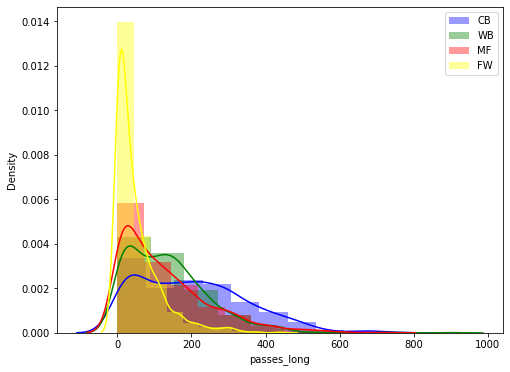

In [53]:
hist('passes_long')

###Through balls

In [54]:
group_pos('through_balls')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.565138,1.236822,0.0,0.0,0.0,1.0,17.0
FW,1753.0,1.693098,3.018293,0.0,0.0,1.0,2.0,48.0
MF,1722.0,1.721254,2.600027,0.0,0.0,1.0,2.0,32.0
WB,959.0,0.771637,1.308790,0.0,0.0,0.0,1.0,18.0


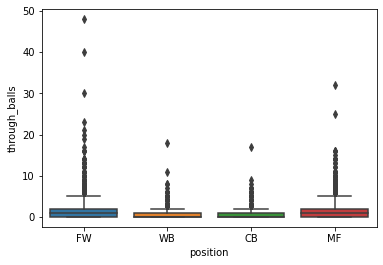

In [55]:
box('through_balls')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

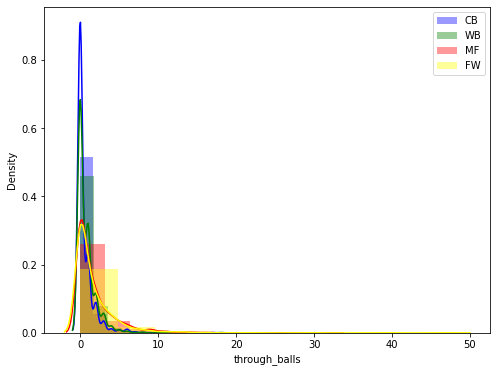

In [56]:
hist('through_balls')

In [57]:
df.drop('through_balls',axis=1,inplace=True)

###Crosses

In [58]:
group_pos('crosses')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,3.834862,7.293800,0.0,0.0,2.0,4.0,103.0
FW,1753.0,20.330291,24.561726,0.0,3.0,11.0,29.0,192.0
MF,1722.0,15.418699,20.891757,0.0,2.0,8.0,20.0,223.0
WB,959.0,35.905109,31.209180,0.0,11.0,28.0,53.5,183.0


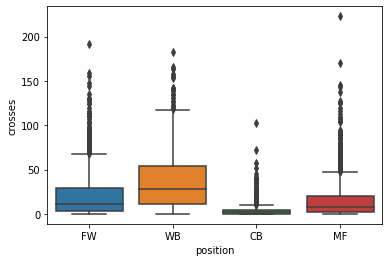

In [59]:
box('crosses')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

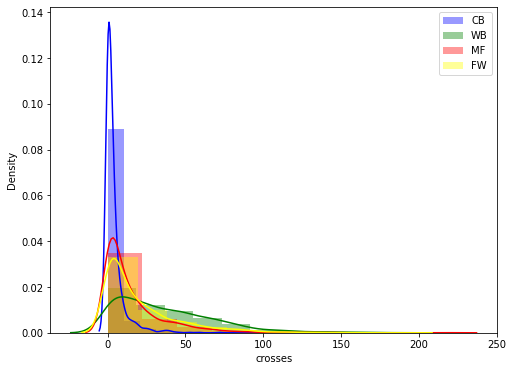

In [60]:
hist('crosses')

###Tackles

In [61]:
group_pos('tackles')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,27.358716,19.605493,0.0,11.00,25.0,40.0,94.0
FW,1753.0,13.318882,12.803635,0.0,3.00,10.0,19.0,88.0
MF,1722.0,30.785134,25.582017,0.0,9.25,26.0,48.0,160.0
WB,959.0,32.511992,23.998861,0.0,13.00,29.0,48.0,138.0


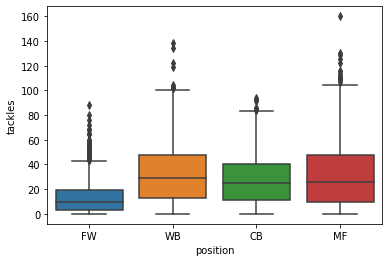

In [62]:
box('tackles')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

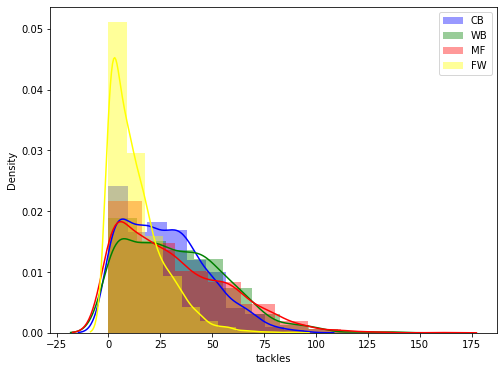

In [63]:
hist('tackles')

###Pressures

In [64]:
group_pos('pressures')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,149.300917,104.582520,0.0,63.0,138.0,215.75,608.0
FW,1753.0,231.482601,190.012409,0.0,69.0,197.0,356.00,1018.0
MF,1722.0,293.833914,221.746305,0.0,101.0,261.0,450.00,1056.0
WB,959.0,215.169969,153.076090,0.0,86.5,203.0,317.50,748.0


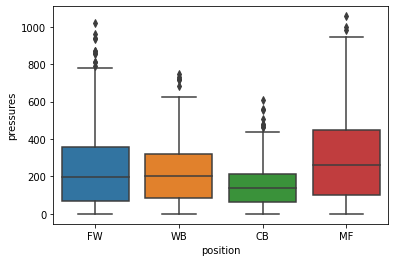

In [65]:
box('pressures')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

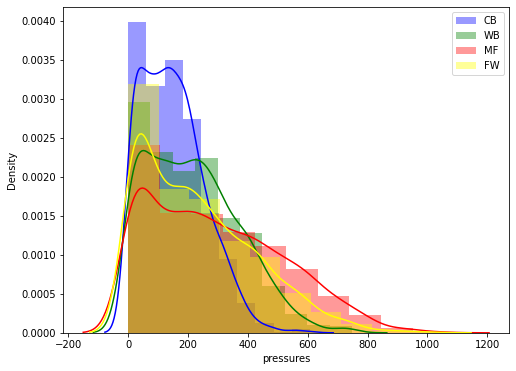

In [66]:
hist('pressures')

###Pressures 3rd def

In [67]:
group_pos('pressures_def_3rd')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,91.814679,63.324014,0.0,39.0,86.0,135.0,395.0
FW,1753.0,37.861951,41.413086,0.0,8.0,24.0,54.0,308.0
MF,1722.0,91.499419,75.061960,0.0,28.0,78.0,138.0,428.0
WB,959.0,106.061522,77.880063,0.0,44.0,98.0,151.5,525.0


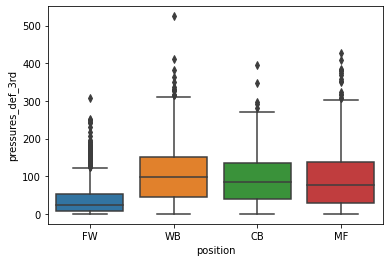

In [68]:
box('pressures_def_3rd')

###Pressures mid 

In [69]:
group_pos('pressures_mid_3rd')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,50.321101,39.786132,0.0,20.0,43.0,72.0,301.0
FW,1753.0,107.721050,91.321490,0.0,31.0,88.0,163.0,514.0
MF,1722.0,150.899535,116.858142,0.0,51.0,131.5,234.0,604.0
WB,959.0,78.034411,58.463127,0.0,28.5,71.0,117.0,289.0


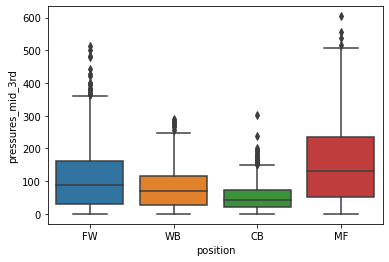

In [70]:
box('pressures_mid_3rd')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

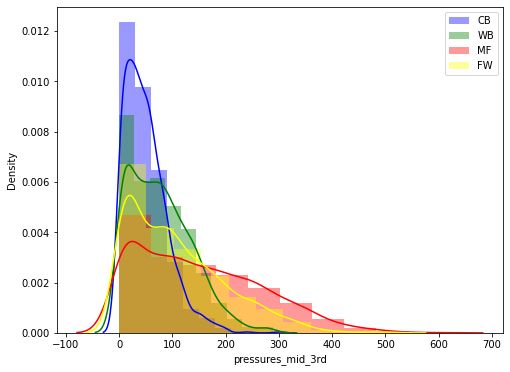

In [71]:
hist('pressures_mid_3rd')

###Pressures att

In [72]:
group_pos('pressures_att_3rd')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,7.165138,8.352005,0.0,2.0,5.0,9.0,71.0
FW,1753.0,85.899601,76.998726,0.0,22.0,67.0,130.0,579.0
MF,1722.0,51.434959,47.146656,0.0,15.0,40.0,74.0,273.0
WB,959.0,31.074035,25.692898,0.0,10.0,27.0,45.0,131.0


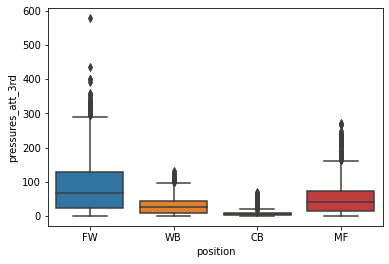

In [73]:
box('pressures_att_3rd')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

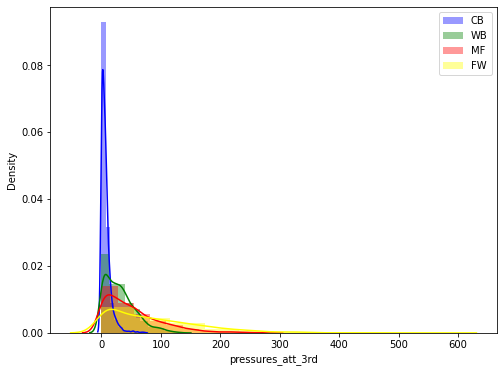

In [74]:
hist('pressures_att_3rd')

###blocks

In [75]:
group_pos('blocks')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,30.017431,20.394427,0.0,12.0,29.0,44.75,96.0
FW,1753.0,13.865374,12.836748,0.0,3.0,10.0,21.00,75.0
MF,1722.0,23.615563,19.263178,0.0,7.0,20.0,37.00,97.0
WB,959.0,31.213764,22.572897,0.0,12.0,30.0,46.00,125.0


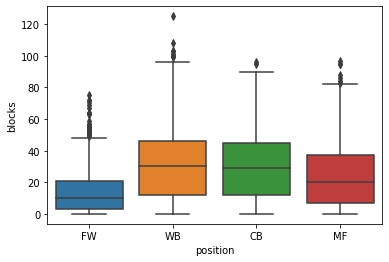

In [76]:
box('blocks')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

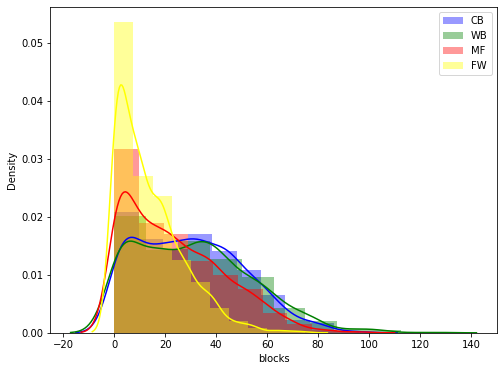

In [77]:
hist('blocks')

###Interceptions

In [78]:
group_pos('interceptions')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,17.448624,13.271607,0.0,7.0,15.0,25.0,72.0
FW,1753.0,5.518540,6.170783,0.0,1.0,4.0,8.0,42.0
MF,1722.0,13.883275,12.741098,0.0,4.0,11.0,21.0,71.0
WB,959.0,15.515120,12.599729,0.0,5.0,13.0,23.0,76.0


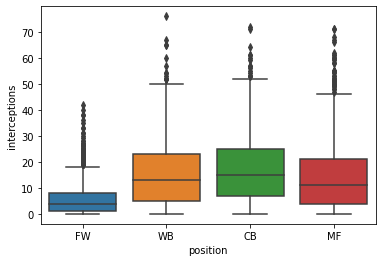

In [79]:
box('interceptions')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

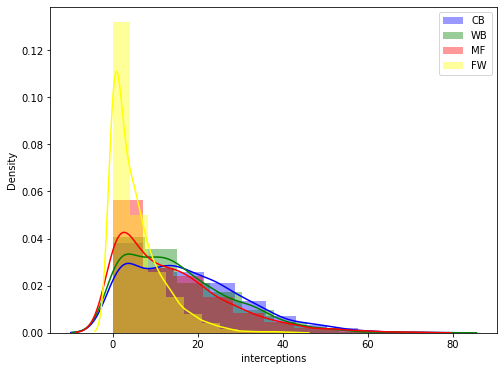

In [80]:
hist('interceptions')

###clearances

In [81]:
group_pos('clearances')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,88.583486,65.074408,0.0,33.0,79.0,135.0,329.0
FW,1753.0,7.687963,8.965571,0.0,1.0,5.0,11.0,67.0
MF,1722.0,19.689895,21.063121,0.0,4.0,13.0,29.0,174.0
WB,959.0,39.976017,32.076182,0.0,14.0,34.0,60.0,207.0


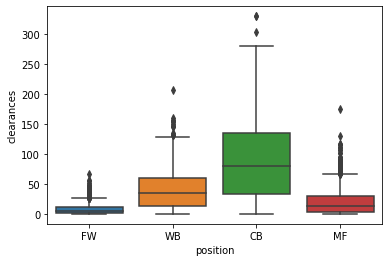

In [82]:
box('clearances')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

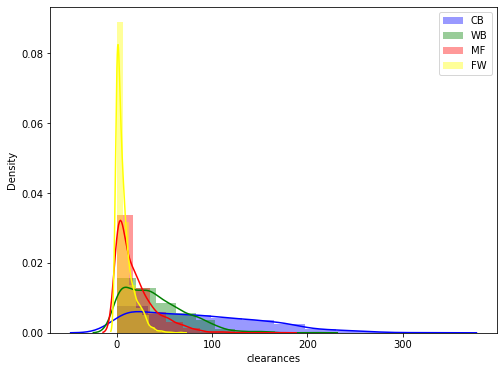

In [83]:
hist('clearances')

###Touches

In [84]:
group_pos('touches')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,1042.899083,703.002211,0.0,427.00,1004.5,1550.50,3465.0
FW,1753.0,562.977752,490.618806,0.0,151.00,452.0,853.00,3029.0
MF,1722.0,903.716028,706.504731,0.0,289.25,790.0,1400.25,3466.0
WB,959.0,996.109489,702.353733,0.0,381.00,948.0,1476.00,3520.0


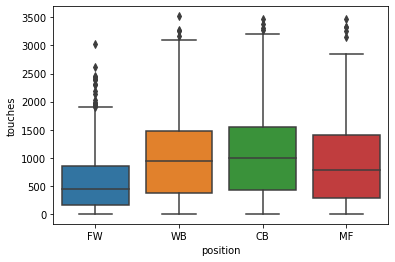

In [85]:
box('touches')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

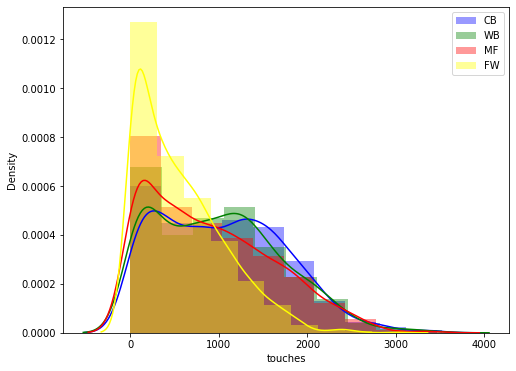

In [86]:
hist('touches')

###Dribbles

In [87]:
group_pos('dribbles')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,6.772477,7.518424,0.0,1.0,5.0,10.00,57.0
FW,1753.0,36.484313,38.696157,0.0,7.0,25.0,53.00,274.0
MF,1722.0,25.244483,25.249413,0.0,6.0,18.0,36.75,187.0
WB,959.0,23.647550,22.162827,0.0,7.0,18.0,33.00,145.0


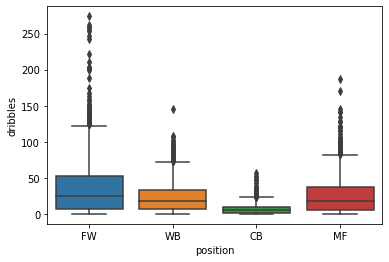

In [88]:
box('dribbles')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

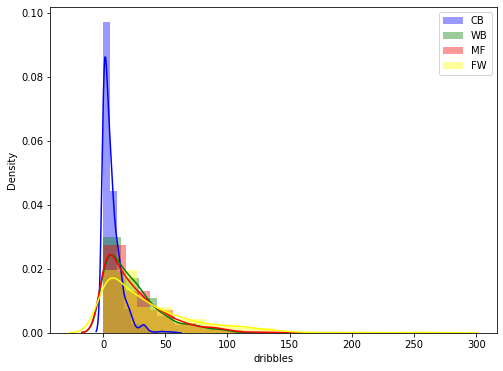

In [89]:
hist('dribbles')

###Carries

In [90]:
group_pos('carries')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,641.208257,469.672951,0.0,245.00,588.0,938.50,2490.0
FW,1753.0,410.401027,381.273872,0.0,104.00,320.0,607.00,2511.0
MF,1722.0,626.276423,504.086219,0.0,199.25,526.0,961.75,2617.0
WB,959.0,599.432742,444.102477,0.0,212.00,553.0,863.50,2206.0


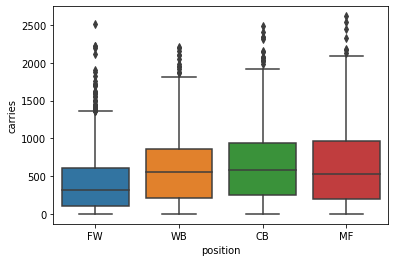

In [91]:
box('carries')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

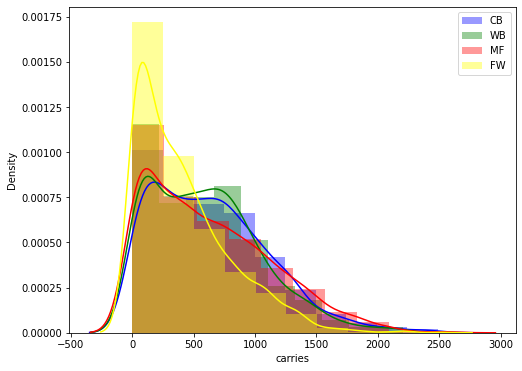

In [92]:
hist('carries')

###Fouls

In [93]:
group_pos('fouls')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,16.890826,12.339400,0.0,7.0,15.0,24.75,67.0
FW,1753.0,17.095265,15.304838,0.0,5.0,14.0,25.00,91.0
MF,1722.0,21.533682,17.141896,0.0,7.0,19.0,33.00,87.0
WB,959.0,17.277372,13.107322,0.0,7.0,15.0,25.00,62.0


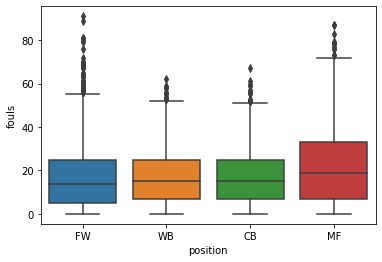

In [94]:
box('fouls')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

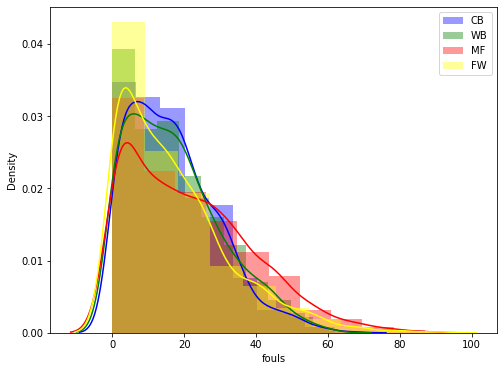

In [95]:
hist('fouls')

In [96]:
df.drop('fouls',axis=1,inplace=True)

###Fouled

In [97]:
group_pos('fouled')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,11.445872,9.817401,0.0,4.0,9.0,16.0,61.0
FW,1753.0,20.259555,19.586579,0.0,5.0,15.0,30.0,119.0
MF,1722.0,19.870499,18.780547,0.0,5.0,15.0,29.0,167.0
WB,959.0,15.423358,13.698823,0.0,4.0,13.0,22.0,94.0


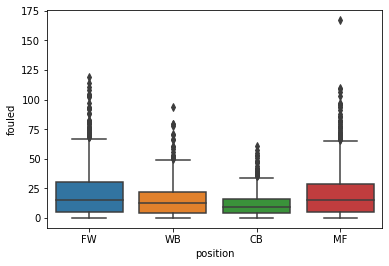

In [98]:
box('fouled')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

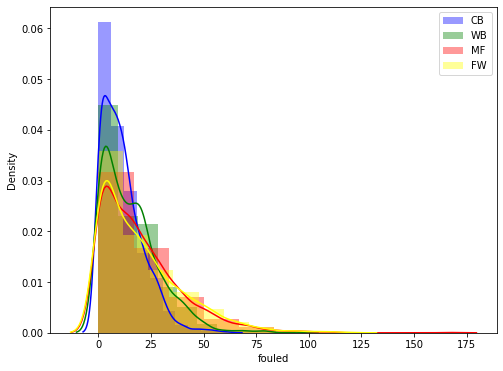

In [99]:
hist('fouled')

CB와 WB를 제외하고는 사실상 거의 같은 수치

###Offsides

In [100]:
group_pos('offsides')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.709174,1.155022,0.0,0.0,0.0,1.0,9.0
FW,1753.0,7.026241,8.432745,0.0,1.0,4.0,10.0,56.0
MF,1722.0,1.249129,2.198214,0.0,0.0,0.0,2.0,24.0
WB,959.0,1.395203,2.016947,0.0,0.0,1.0,2.0,16.0


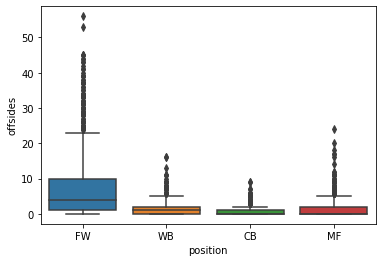

In [101]:
box('offsides')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

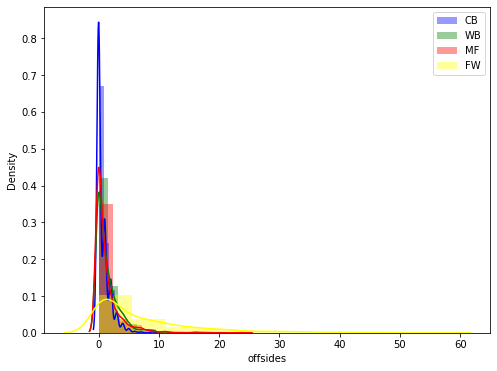

In [102]:
hist('offsides')

###Card yellowwm

In [103]:
group_pos('cards_yellowm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.002663,0.004257,0.0,0.001027,0.002105,0.003303,0.111111
FW,1753.0,0.002295,0.005638,0.0,0.000000,0.001443,0.002805,0.111111
MF,1722.0,0.002918,0.008803,0.0,0.000672,0.002143,0.003628,0.333333
WB,959.0,0.002444,0.004207,0.0,0.000826,0.001912,0.003232,0.111111


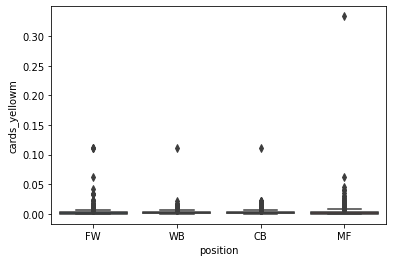

In [104]:
box('cards_yellowm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

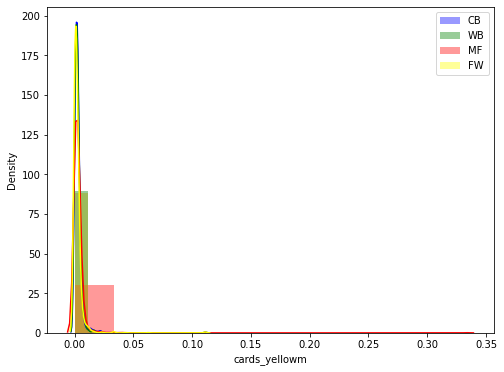

In [105]:
hist('cards_yellowm')

실상 거의 같은 수치

In [106]:
df.drop(columns = 'cards_yellowm',axis=1,inplace=True)

###Card redm

In [107]:
group_pos('cards_redm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.000144,0.000464,0.0,0.0,0.0,0.0,0.005814
FW,1753.0,0.000110,0.000657,0.0,0.0,0.0,0.0,0.013699
MF,1722.0,0.000119,0.000575,0.0,0.0,0.0,0.0,0.013158
WB,959.0,0.000089,0.000328,0.0,0.0,0.0,0.0,0.004310


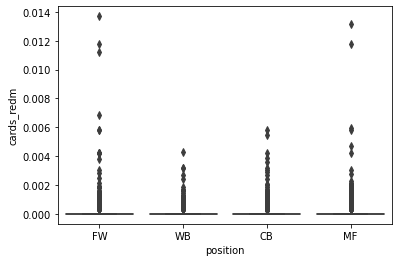

In [108]:
box('cards_redm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

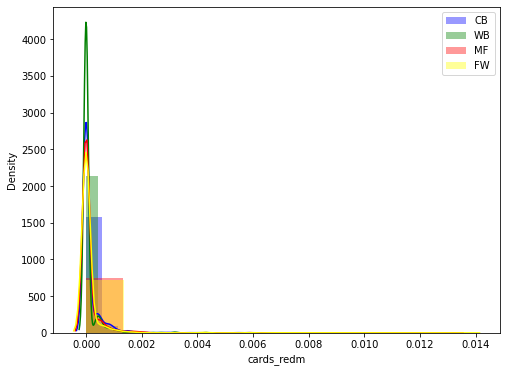

In [109]:
hist('cards_redm')

In [110]:
df.drop(columns = 'cards_redm',axis=1,inplace=True)

###Passesm

In [111]:
group_pos('passesm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.576801,0.707351,0.0,0.421557,0.515757,0.639738,16.461538
FW,1753.0,0.605269,4.574529,0.0,0.259115,0.348675,0.481646,132.000000
MF,1722.0,0.777194,4.642777,0.0,0.408650,0.516526,0.636092,132.000000
WB,959.0,0.602069,0.784843,0.0,0.462418,0.550051,0.649933,16.857143


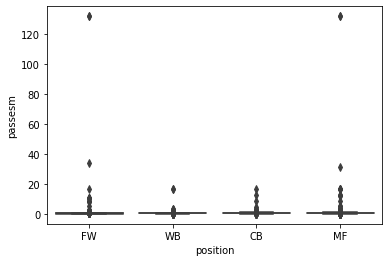

In [112]:
box('passesm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

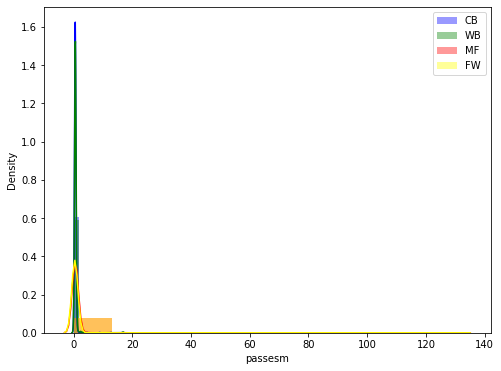

In [113]:
hist('passesm')

In [114]:
df.drop(columns = 'passesm',axis=1,inplace=True)

###short passesm

In [115]:
group_pos('passes_shortm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.175907,0.295638,0.0,0.106918,0.147087,0.198755,7.076923
FW,1753.0,0.271931,2.049833,0.0,0.123857,0.160391,0.209459,59.363636
MF,1722.0,0.317865,2.062564,0.0,0.159882,0.203588,0.260793,59.363636
WB,959.0,0.237781,0.295046,0.0,0.163884,0.214573,0.267449,6.126984


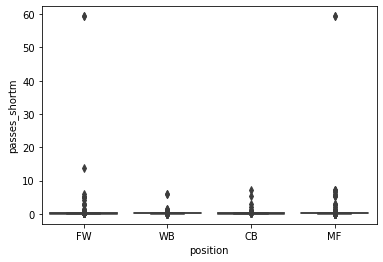

In [116]:
box('passes_shortm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

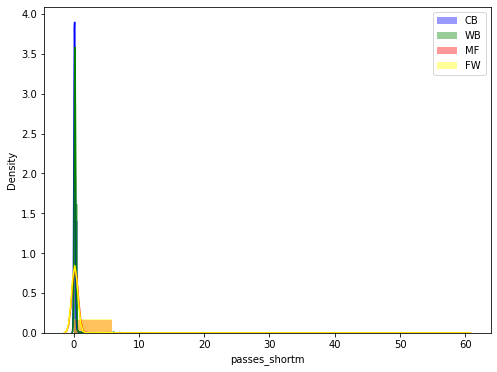

In [117]:
hist('passes_shortm')

In [118]:
df.drop(columns = 'passes_shortm',axis=1,inplace=True)

###Passesm medium

In [119]:
group_pos('passes_mediumm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.263426,0.277274,0.0,0.179695,0.234734,0.304920,5.384615
FW,1753.0,0.219197,1.780983,0.0,0.076433,0.113636,0.172438,51.363636
MF,1722.0,0.304440,1.817981,0.0,0.144073,0.200050,0.255072,51.363636
WB,959.0,0.243380,0.361300,0.0,0.175636,0.221978,0.263601,7.698413


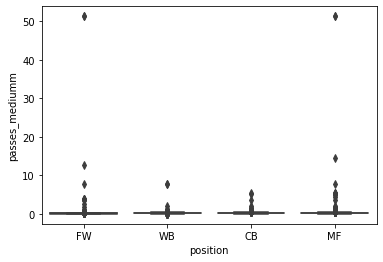

In [120]:
box('passes_mediumm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

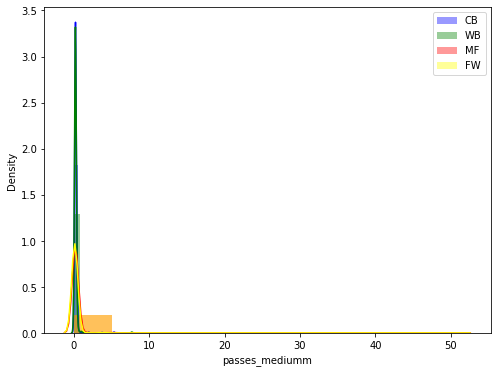

In [121]:
hist('passes_mediumm')

In [122]:
df.drop(columns = 'passes_mediumm',axis=1,inplace=True)

###passes final thirdm

In [123]:
group_pos('passes_into_final_thirdm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.033080,0.064396,0.0,0.016836,0.026972,0.038270,1.517045
FW,1753.0,0.035713,0.319789,0.0,0.008547,0.015202,0.027484,9.272727
MF,1722.0,0.055145,0.328682,0.0,0.020702,0.034002,0.050414,9.272727
WB,959.0,0.034303,0.058834,0.0,0.019614,0.028777,0.038730,1.015873


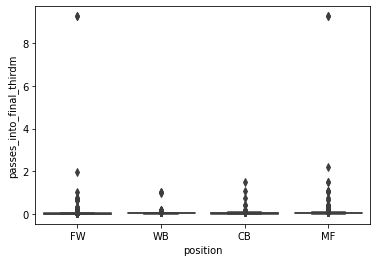

In [124]:
box('passes_into_final_thirdm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

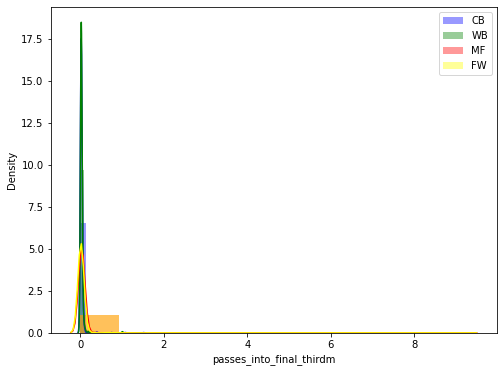

In [125]:
hist('passes_into_final_thirdm')

In [126]:
df.drop(columns = 'passes_into_final_thirdm',axis=1,inplace=True)

###passes penalty area

In [127]:
group_pos('passes_into_penalty_aream')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.004780,0.017965,0.0,0.000355,0.001840,0.004543,0.384615
FW,1753.0,0.016644,0.146571,0.0,0.002942,0.008012,0.014167,4.272727
MF,1722.0,0.015914,0.149051,0.0,0.003022,0.007640,0.012875,4.272727
WB,959.0,0.011155,0.019615,0.0,0.004965,0.009475,0.013885,0.396825


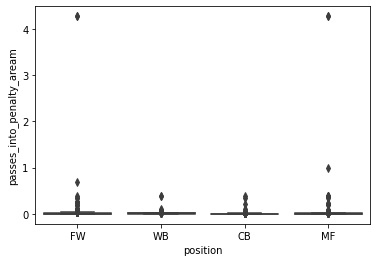

In [128]:
box('passes_into_penalty_aream')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

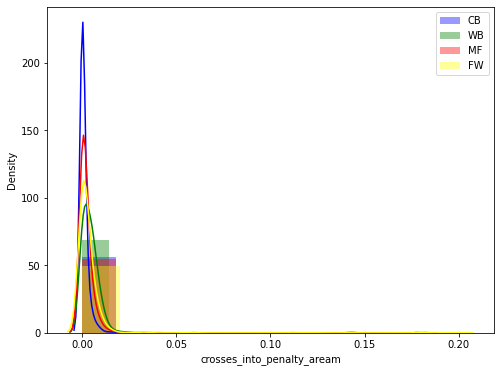

In [129]:
hist('crosses_into_penalty_aream')

In [130]:
df.drop(columns = 'crosses_into_penalty_aream',axis=1,inplace=True)

###Crossesm

In [131]:
group_pos('crossesm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.005074,0.008730,0.0,0.000000,0.001409,0.005441,0.062444
FW,1753.0,0.016082,0.017803,0.0,0.004505,0.011740,0.023235,0.250000
MF,1722.0,0.011441,0.012781,0.0,0.001934,0.007209,0.016628,0.090909
WB,959.0,0.021940,0.020637,0.0,0.010244,0.020256,0.029904,0.333333


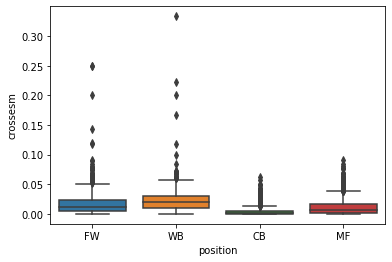

In [132]:
box('crossesm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

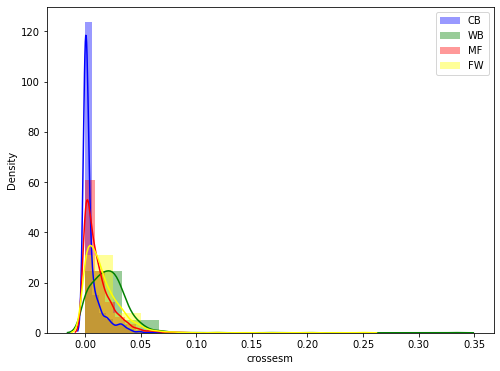

In [133]:
hist('crossesm')

###Throw in

In [134]:
group_pos('throw_insm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.013552,0.026602,0.0,0.000630,0.002554,0.010464,0.233333
FW,1753.0,0.010532,0.024787,0.0,0.000000,0.002413,0.006772,0.285714
MF,1722.0,0.011122,0.024621,0.0,0.000000,0.002284,0.006449,0.200000
WB,959.0,0.068803,0.047772,0.0,0.011234,0.081539,0.103378,0.333333


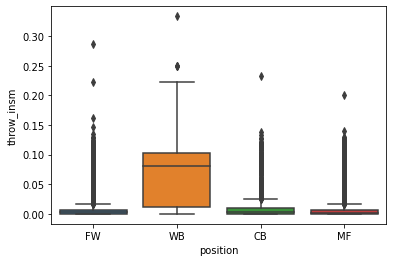

In [135]:
box('throw_insm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

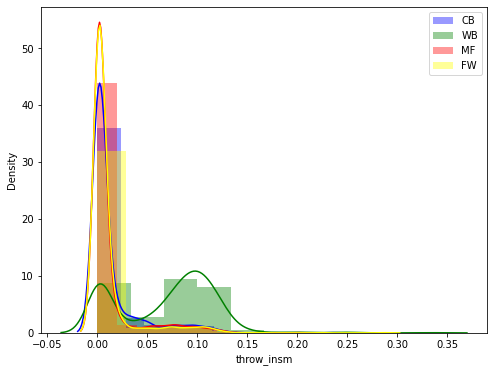

In [136]:
hist('throw_insm')

###Passes offsidesm

In [137]:
group_pos('passes_offsidesm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.001401,0.001697,0.0,0.0,0.001074,0.001956,0.014706
FW,1753.0,0.001418,0.001996,0.0,0.0,0.000985,0.002122,0.037037
MF,1722.0,0.001763,0.002239,0.0,0.0,0.001333,0.002646,0.030303
WB,959.0,0.001718,0.001899,0.0,0.0,0.001409,0.002506,0.024390


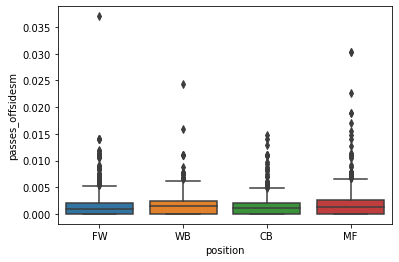

In [138]:
box('passes_offsidesm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

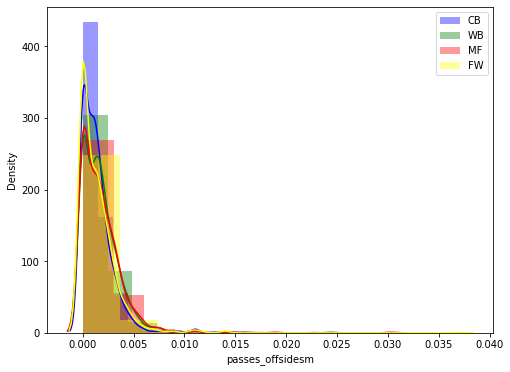

In [139]:
hist('passes_offsidesm')

In [140]:
df.drop(columns = 'passes_offsidesm',axis=1,inplace=True)

###Tacklesm

In [141]:
group_pos('tacklesm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.018304,0.015319,0.0,0.012065,0.016998,0.022848,0.333333
FW,1753.0,0.016245,0.030407,0.0,0.006807,0.012658,0.020322,0.880000
MF,1722.0,0.024231,0.046407,0.0,0.013846,0.021343,0.028662,1.272727
WB,959.0,0.022451,0.012638,0.0,0.015296,0.021739,0.028302,0.111111


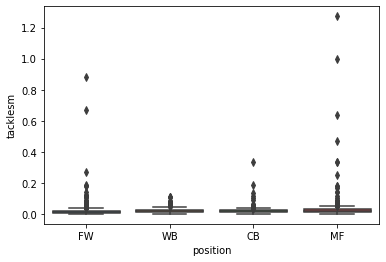

In [142]:
box('tacklesm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

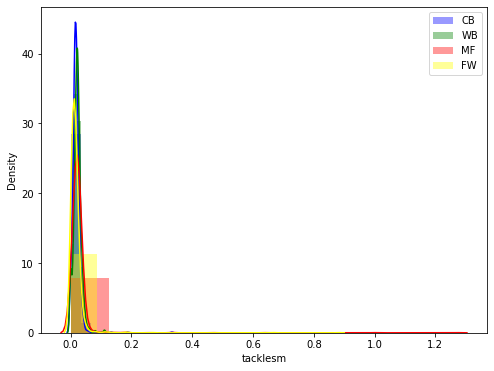

In [143]:
hist('tacklesm')

###Pressuresm

In [144]:
group_pos('pressuresm')

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
CB,1090.0,0.129136,0.108106,0.0,0.079724,0.106850,0.154958,2.000000
FW,1753.0,0.230509,0.448733,0.0,0.160149,0.204112,0.250821,17.200000
MF,1722.0,0.233487,0.287435,0.0,0.166995,0.216400,0.265177,7.787879
WB,959.0,0.173917,0.096589,0.0,0.130920,0.162679,0.201831,1.500000


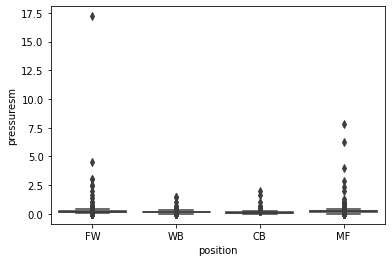

In [145]:
box('pressuresm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

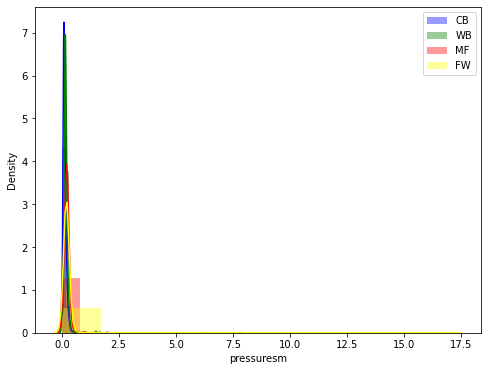

In [146]:
hist('pressuresm')

#Data Preprocessing

In [147]:
df.shape

(5524, 28)

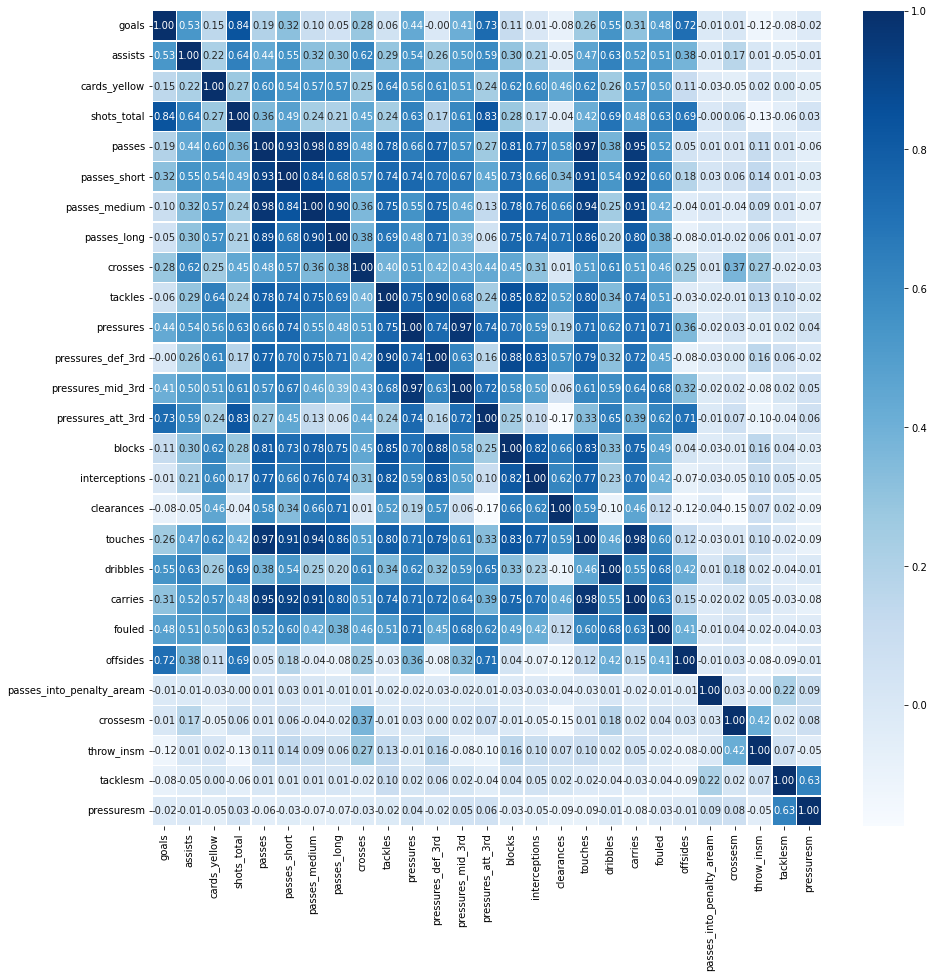

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [149]:
#상관관계 0.9 이상 제거
df.drop(columns=['passes_short','passes_medium','touches','carries','pressures_mid_3rd'],axis=1,inplace=True)

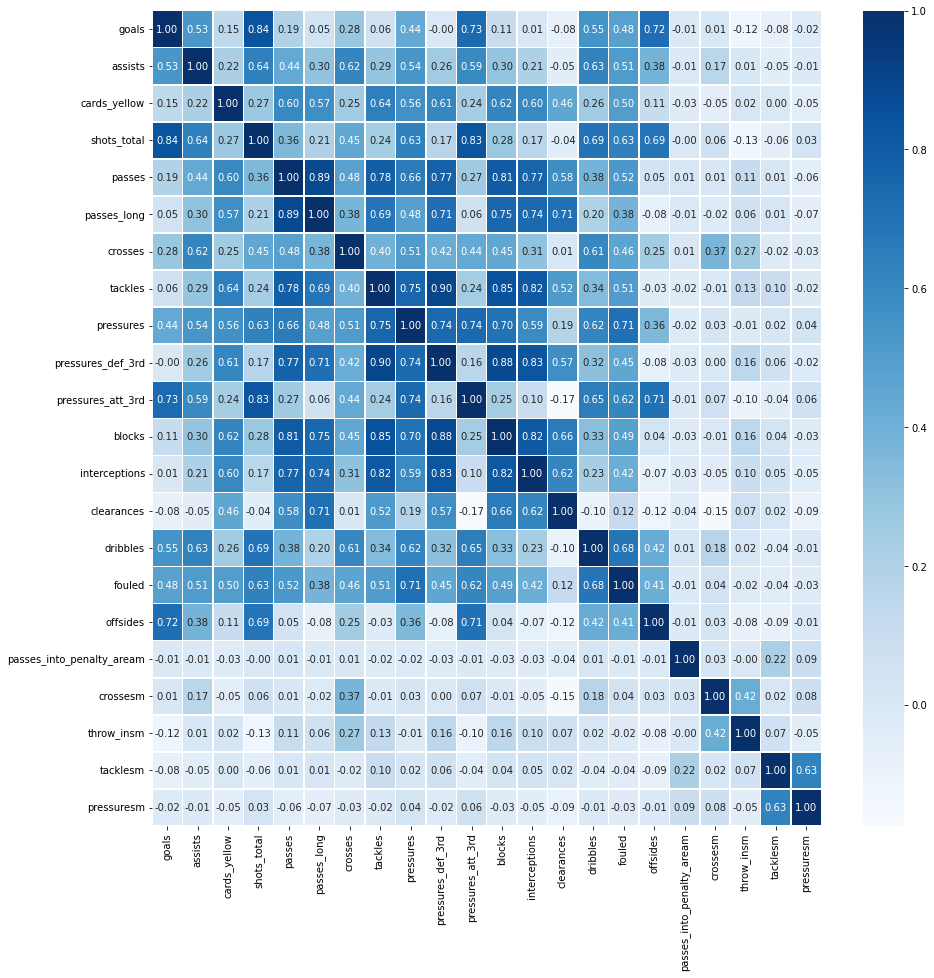

In [150]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

#Test Train Split

In [209]:
from sklearn.model_selection import train_test_split

In [210]:
df.replace({'position':{'CB':0,'WB':1,"MF":2,'FW':3}},inplace=True)

In [211]:
train, test = train_test_split(df, test_size=0.33, random_state=204)
train, val = train_test_split(train, test_size=0.33, random_state=204)

In [213]:
X_train, y_train = train.drop('position', axis=1), train.position
X_val, y_val = val.drop('position', axis=1), val.position
X_test, y_test = test.drop('position', axis=1), test.position

In [155]:
print(train.shape)
print(val.shape)
print(test.shape)

(2479, 23)
(1222, 23)
(1823, 23)


In [156]:
df.columns

Index(['position', 'goals', 'assists', 'cards_yellow', 'shots_total', 'passes',
       'passes_long', 'crosses', 'tackles', 'pressures', 'pressures_def_3rd',
       'pressures_att_3rd', 'blocks', 'interceptions', 'clearances',
       'dribbles', 'fouled', 'offsides', 'passes_into_penalty_aream',
       'crossesm', 'throw_insm', 'tacklesm', 'pressuresm'],
      dtype='object')

#Modeling

###Setting

In [157]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def confusion(model):
  disp = plot_confusion_matrix(
    model, X_test, y_test, 
    cmap='Blues', values_format='d')


###LR

In [218]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [219]:
lr_test_prediction = lr.predict(X_val)
print_score(y_val, lr_test_prediction, train=False)

Test Result:
Accuracy Score: 84.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.889764    0.881818    0.822157    0.829630  0.849427   
recall       0.907631    0.825532    0.783333    0.888889  0.849427   
f1-score     0.898608    0.852747    0.802276    0.858238  0.849427   
support    249.000000  235.000000  360.000000  378.000000  0.849427   

             macro avg  weighted avg  
precision     0.855842      0.849718  
recall        0.851346      0.849427  
f1-score      0.852967      0.848922  
support    1222.000000   1222.000000  
_______________________________________________
Confusion Matrix: 
 [[226  12   9   2]
 [ 20 194  17   4]
 [  7   8 282  63]
 [  1   6  35 336]]



In [220]:
f1_score(y_val, lr_test_prediction, average='macro')

0.8529672776778167

###SVM

In [221]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [222]:
cvm_test_prediction = clf.predict(X_val)
print_score(y_val, cvm_test_prediction, train=False)

Test Result:
Accuracy Score: 72.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.888889    0.785714    0.723270    0.648855  0.727496   
recall       0.706827    0.608511    0.638889    0.899471  0.727496   
f1-score     0.787472    0.685851    0.678466    0.753880  0.727496   
support    249.000000  235.000000  360.000000  378.000000  0.727496   

             macro avg  weighted avg  
precision     0.761682      0.746007  
recall        0.713424      0.727496  
f1-score      0.726417      0.725426  
support    1222.000000   1222.000000  
_______________________________________________
Confusion Matrix: 
 [[176  21  21  31]
 [ 11 143  36  45]
 [ 10  12 230 108]
 [  1   6  31 340]]



In [223]:
f1_score(y_val, cvm_test_prediction, average='macro')

0.7264174243776452

###XGBoost

In [224]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_xgb_pred = xgb_clf.predict(X_val)

In [225]:
print_score(y_val, y_test_xgb_pred, train=False)

Test Result:
Accuracy Score: 82.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.913223    0.879808    0.774286    0.793839  0.826514   
recall       0.887550    0.778723    0.752778    0.886243  0.826514   
f1-score     0.900204    0.826185    0.763380    0.837500  0.826514   
support    249.000000  235.000000  360.000000  378.000000  0.826514   

             macro avg  weighted avg  
precision     0.840289      0.828937  
recall        0.826324      0.826514  
f1-score      0.831817      0.826265  
support    1222.000000   1222.000000  
_______________________________________________
Confusion Matrix: 
 [[221  10  15   3]
 [ 14 183  28  10]
 [  6   9 271  74]
 [  1   6  36 335]]



In [226]:
f1_score(y_val, y_test_xgb_pred, average='macro')

0.831817262314514

###Random Forest

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_val_pred = rf_clf.predict(X_val)
print_score(y_val, y_val_pred, train=False)

Test Result:
Accuracy Score: 84.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.917355    0.881517    0.799410    0.811628  0.841244   
recall       0.891566    0.791489    0.752778    0.923280  0.841244   
f1-score     0.904277    0.834081    0.775393    0.863861  0.841244   
support    249.000000  235.000000  360.000000  378.000000  0.841244   

             macro avg  weighted avg  
precision     0.852477      0.843012  
recall        0.839778      0.841244  
f1-score      0.844403      0.840307  
support    1222.000000   1222.000000  
_______________________________________________
Confusion Matrix: 
 [[222  14  11   2]
 [ 11 186  31   7]
 [  9   8 271  72]
 [  0   3  26 349]]



In [229]:
f1_score(y_val, y_val_pred, average='macro')

0.8444031271352569

###ANN

In [175]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [176]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['rating_3'] += 1
        elif i == 1: 
            count_dict['rating_4'] += 1
        elif i == 2: 
            count_dict['rating_5'] += 1
        elif i == 3: 
            count_dict['rating_6'] += 1
        else:
            print("Check classes.")
            
    return count_dict

In [177]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [178]:
train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [179]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [180]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0021, 0.0024, 0.0013, 0.0012])


In [181]:
class_weights_all = class_weights[target_list]

In [182]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [183]:
X= train.drop('position', axis=1)

EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 4

In [184]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [185]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [186]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [187]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=22, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [188]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [189]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [190]:
from tqdm.notebook import tqdm
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
      X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
      optimizer.zero_grad()
      y_train_pred = model(X_train_batch)  
      train_loss = criterion(y_train_pred, y_train_batch)
      train_acc = multi_acc(y_train_pred, y_train_batch)
      train_loss.backward()
      optimizer.step()
        
      train_epoch_loss += train_loss.item()
      train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
      val_epoch_loss = 0
      val_epoch_acc = 0
        
      model.eval()
      for X_val_batch, y_val_batch in val_loader:
        X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
           
        y_val_pred = model(X_val_batch)
                        
        val_loss = criterion(y_val_pred, y_val_batch)
        val_acc = multi_acc(y_val_pred, y_val_batch)
            
        val_epoch_loss += val_loss.item()
        val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.86143 | Val Loss: 0.70075 | Train Acc: 62.935| Val Acc: 71.849
Epoch 002: | Train Loss: 0.65242 | Val Loss: 0.59623 | Train Acc: 72.761| Val Acc: 75.123
Epoch 003: | Train Loss: 0.59660 | Val Loss: 0.61035 | Train Acc: 74.987| Val Acc: 74.550
Epoch 004: | Train Loss: 0.56772 | Val Loss: 0.54736 | Train Acc: 76.658| Val Acc: 77.823
Epoch 005: | Train Loss: 0.51108 | Val Loss: 0.51072 | Train Acc: 79.271| Val Acc: 82.079
Epoch 006: | Train Loss: 0.53847 | Val Loss: 0.54247 | Train Acc: 77.871| Val Acc: 77.823
Epoch 007: | Train Loss: 0.47936 | Val Loss: 0.51529 | Train Acc: 80.000| Val Acc: 79.787
Epoch 008: | Train Loss: 0.52117 | Val Loss: 0.58406 | Train Acc: 78.852| Val Acc: 76.023
Epoch 009: | Train Loss: 0.52249 | Val Loss: 0.50408 | Train Acc: 77.290| Val Acc: 81.178
Epoch 010: | Train Loss: 0.50128 | Val Loss: 0.51397 | Train Acc: 78.187| Val Acc: 78.887
Epoch 011: | Train Loss: 0.50295 | Val Loss: 0.51884 | Train Acc: 78.974| Val Acc: 78.642
Epoch 012:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

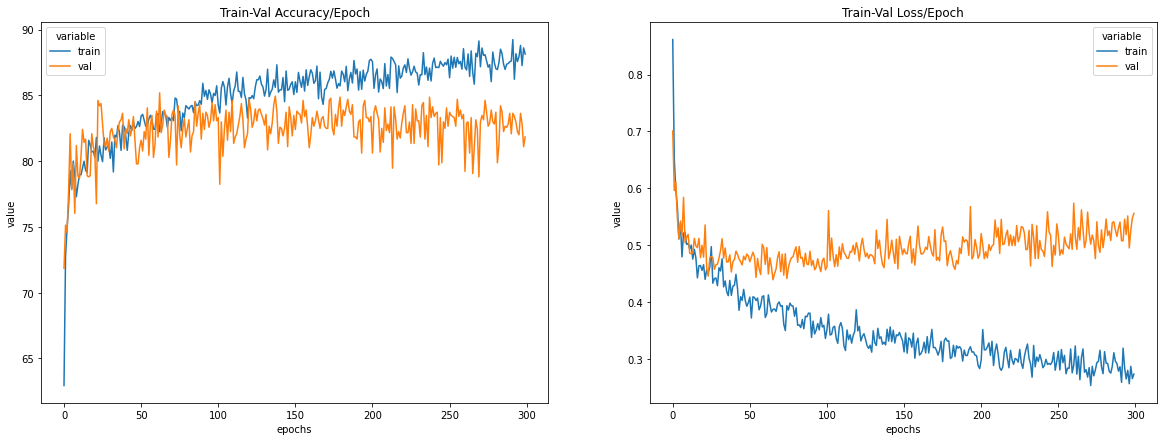

In [191]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

####ANN 평가

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

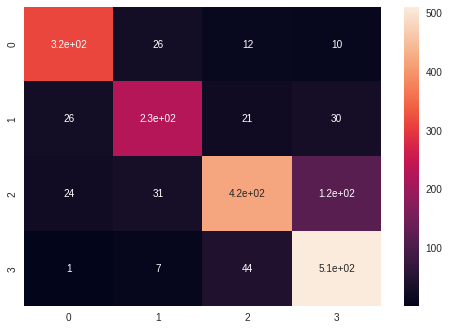

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list))

sns.heatmap(confusion_matrix_df, annot=True)

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       363
           1       0.78      0.75      0.76       306
           2       0.84      0.71      0.77       592
           3       0.76      0.91      0.83       562

    accuracy                           0.81      1823
   macro avg       0.81      0.81      0.81      1823
weighted avg       0.81      0.81      0.81      1823



###Feature Importance

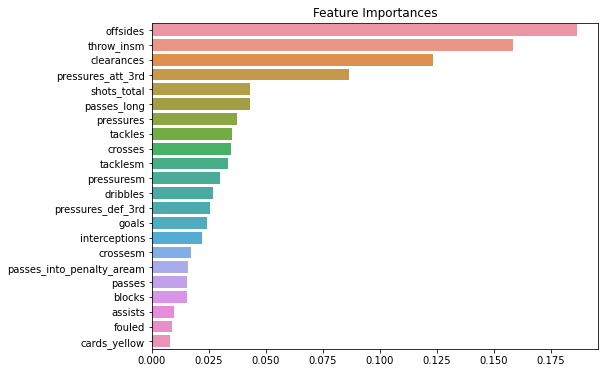

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#Grid Search

###LR

In [215]:
from sklearn.model_selection import GridSearchCV

In [230]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
lr = LogisticRegression()
clf_lr = GridSearchCV(lr, param_grid = parameters,scoring = 'accuracy', cv = 10)
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [231]:
print('best parameters : ', clf_lr.best_params_)
print('best score : ', clf_lr.best_score_)
gs_lr = clf_lr.best_score_

best parameters :  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
best score :  0.8563895781637717


In [232]:
lr_pred = clf_lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print_score(y_test, lr_pred, train=False)

Test Result:
Accuracy Score: 83.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.912181    0.824324    0.812281    0.816225  0.834888   
recall       0.887052    0.797386    0.782095    0.877224  0.834888   
f1-score     0.899441    0.810631    0.796902    0.845626  0.834888   
support    363.000000  306.000000  592.000000  562.000000  0.834888   

             macro avg  weighted avg  
precision     0.841253      0.835411  
recall        0.835939      0.834888  
f1-score      0.838150      0.834645  
support    1823.000000   1823.000000  
_______________________________________________
Confusion Matrix: 
 [[322  19  18   4]
 [ 18 244  31  13]
 [ 10  25 463  94]
 [  3   8  58 493]]



In [243]:
lr_f1=f1_score(y_test, lr_pred, average='macro')
f1_score(y_test, lr_pred, average='macro')

0.8381501338366514

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


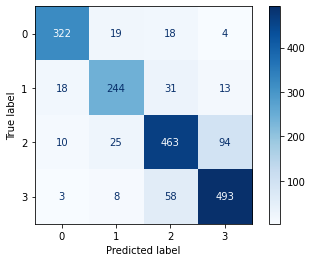

In [234]:
confusion(clf_lr)

###XGB

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier()
xgb_gs = GridSearchCV(xgb, param_grid = params,scoring = 'accuracy', cv = 10)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [ ]:
#효율이 가장 좋은 하이퍼파라미터 프린트
#효율이 가장 좋은 AUC ROC Value 값 프린트(선택 가능 - Accuray, Recall 등)
print('best parameters : ', xgb_gs.best_params_)
print('best score : ', xgb_gs.best_score_)
gs_xgb = xgb_gs.best_score_

best parameters :  {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
best score :  0.8443243243243244


In [235]:
xgb_clf = XGBClassifier(colsample_bytree= 0.6, gamma= 1.5, max_depth= 4, min_child_weight = 1, subsample = 0.8)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_xgb_pred = xgb_clf.predict(X_test)
print_score(y_test, y_test_xgb_pred, train=False)

Test Result:
Accuracy Score: 82.61%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.909348    0.832740    0.797468    0.801887  0.826111   
recall       0.884298    0.764706    0.744932    0.907473  0.826111   
f1-score     0.896648    0.797274    0.770306    0.851419  0.826111   
support    363.000000  306.000000  592.000000  562.000000  0.826111   

             macro avg  weighted avg  
precision     0.835361      0.827029  
recall        0.825352      0.826111  
f1-score      0.828912      0.824996  
support    1823.000000   1823.000000  
_______________________________________________
Confusion Matrix: 
 [[321  18  22   2]
 [ 14 234  44  14]
 [ 15  26 441 110]
 [  3   3  46 510]]



In [242]:
xgb_acc = accuracy_score(y_test, y_test_xgb_pred)
xgb_f1 = f1_score(y_test, y_test_xgb_pred, average='macro')

In [236]:
f1_score(y_test, y_test_xgb_pred, average='macro')

0.8289117573119307

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


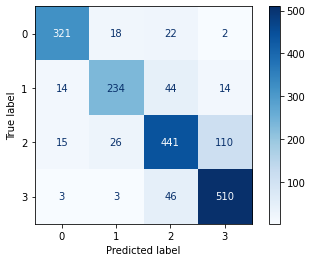

In [238]:
confusion(xgb_clf)

###RF

In [ ]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param_grid = params,scoring = 'accuracy', cv = 10)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             scoring='accuracy')

In [ ]:
#효율이 가장 좋은 하이퍼파라미터 프린트
#효율이 가장 좋은 AUC ROC Value 값 프린트(선택 가능 - Accuray, Recall 등)
print('best parameters : ', gs_rf.best_params_)
print('best score : ', gs_rf.best_score_)
gs_rf = gs_rf.best_score_

best parameters :  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
best score :  0.8172972972972975


In [245]:
gs_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 8,min_samples_split= 8, n_estimators= 100)
gs_rf.fit(X_train, y_train)

rf_pred = gs_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred,average='macro')
print_score(y_test, rf_pred, train=False)

Test Result:
Accuracy Score: 79.98%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.897143    0.811111    0.771375    0.766917  0.799781   
recall       0.865014    0.715686    0.701014    0.907473  0.799781   
f1-score     0.880785    0.760417    0.734513    0.831296  0.799781   
support    363.000000  306.000000  592.000000  562.000000  0.799781   

             macro avg  weighted avg  
precision     0.811637      0.801714  
recall        0.797297      0.799781  
f1-score      0.801753      0.797824  
support    1823.000000   1823.000000  
_______________________________________________
Confusion Matrix: 
 [[314  20  26   3]
 [ 16 219  53  18]
 [ 19  24 415 134]
 [  1   7  44 510]]



In [246]:
f1_score(y_test, rf_pred, average='macro')

0.8017527995671182

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


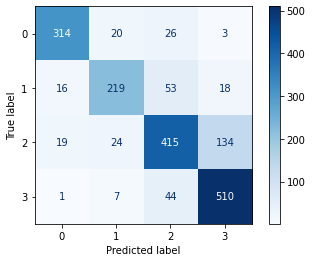

In [247]:
confusion(gs_rf)

###비교

In [249]:
gs_lr,gs_xgb,gs_rf = 0.8563895781637717, 0.8443243243243244, 0.8172972972972975

In [250]:
acc_score = [lr_acc,xgb_acc,rf_acc]
f1_score =[lr_f1,xgb_f1,rf_f1]
gs_score = [gs_lr,gs_xgb,gs_rf]
x = np.arange(len(acc_score))

labels = ['Linear Regression', 'XGBoost Classifier','Random Forest','ANN(pytorch)']
colors = ['red', 'blue', 'green','yellow']

In [251]:
for i in range(3):
  print('GridSV Score |{}| : {:.3f}'.format(labels[i],gs_score[i]))

GridSV Score |Linear Regression| : 0.856
GridSV Score |XGBoost Classifier| : 0.844
GridSV Score |Random Forest| : 0.817


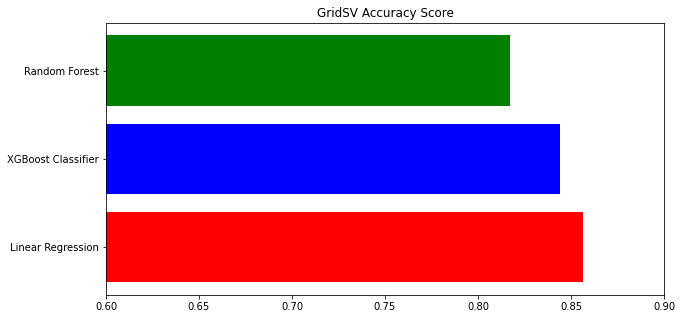

In [252]:
x_gv = np.arange(len(gs_score))
labels_gv = ['Linear Regression', 'XGBoost Classifier','Random Forest']
plt.figure(figsize=(10,5))
plt.barh(x_gv, gs_score,color=colors)
plt.title('GridSV Accuracy Score')
plt.yticks(x_gv, labels_gv)
plt.xlim(0.6,0.9)
plt.show()


In [253]:
for i in range(3):
  print('Accuracy Score |{}| : {:.3f}'.format(labels[i],acc_score[i]))

Accuracy Score |Linear Regression| : 0.835
Accuracy Score |XGBoost Classifier| : 0.826
Accuracy Score |Random Forest| : 0.800


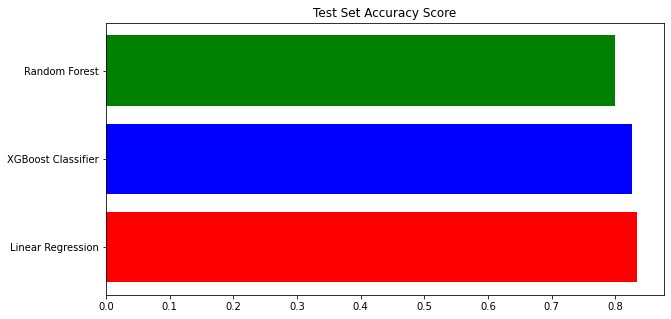

In [259]:
plt.figure(figsize=(10,5))
plt.barh(x, acc_score,color=colors)
plt.title('Test Set Accuracy Score')
plt.yticks(x, labels)
plt.show()

In [261]:
for i in range(3):
  print('F1 Score |{}| : {:.3f}'.format(labels[i],f1_score[i]))

F1 Score |Linear Regression| : 0.838
F1 Score |XGBoost Classifier| : 0.829
F1 Score |Random Forest| : 0.802


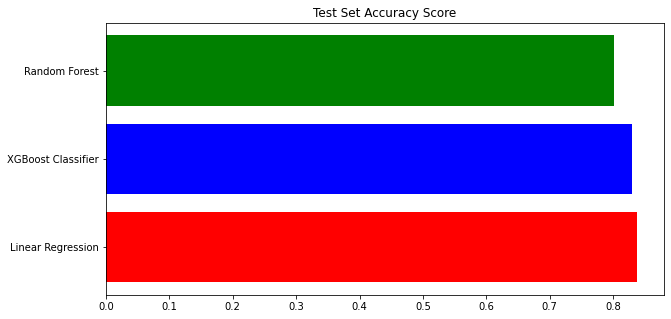

In [260]:
plt.figure(figsize=(10,5))
plt.barh(x, f1_score,color=colors)
plt.title('Test Set Accuracy Score')
plt.yticks(x, labels)
plt.show()

#부록

###PCA에 따른 변화

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from matplotlib import figure
def pca_training(model):
  col = len(X_train.columns)
  accuracy = []
  for i in range(1,col-1):
    pca_breast = PCA(n_components=i)
    scaler = StandardScaler().fit(X_train)
    scale_X_train = scaler.fit_transform(X_train)
    scale_X_val = scaler.fit_transform(X_val)
    pca_train = pca_breast.fit_transform(scale_X_train)
    pca_val = pca_breast.fit_transform(scale_X_val)
    lr = model()
    lr.fit(pca_train, y_train)
    lr_test_prediction = lr.predict(pca_val)
    accuracy.append(accuracy_score(y_val, lr_test_prediction))
    print(accuracy_score(y_val, lr_test_prediction))
  plt.figure(figsize=(8,6))
  plt.plot(accuracy)

0.3481081081081081
0.6610810810810811
0.7356756756756757
0.6416216216216216
0.6708108108108108
0.6572972972972972
0.5324324324324324
0.5335135135135135
0.5632432432432433
0.5751351351351351
0.5832432432432433
0.5989189189189189
0.607027027027027
0.6086486486486486
0.587027027027027
0.6064864864864865
0.6043243243243244


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6075675675675676
0.6075675675675676


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6102702702702703
0.6102702702702703


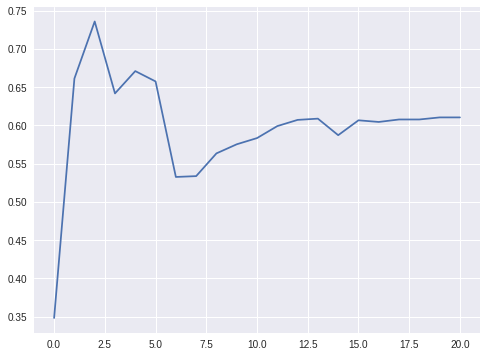

In [ ]:
pca_training(LogisticRegression)

0.26756756756756755
0.6481081081081081
0.7216216216216216
0.6102702702702703
0.6205405405405405
0.6102702702702703
0.5962162162162162
0.6048648648648649
0.6308108108108108
0.6362162162162163
0.6308108108108108
0.6227027027027027
0.6221621621621621
0.6162162162162163
0.6232432432432432
0.6124324324324324
0.6264864864864865
0.6097297297297297
0.6351351351351351
0.6118918918918919
0.654054054054054


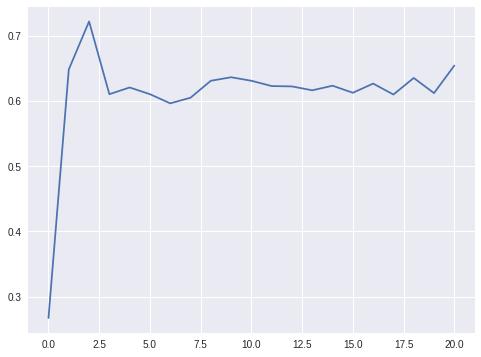

In [ ]:
pca_training(RandomForestClassifier)